Pair Programming Visualización III
En este ejercicio, de nuevo, trabajaremos con el csv que generamos en el ejercicio de pair programming de Pandas V, ese en el que habíamos unido distintos csv en uno.
En estos ejercicios aprenderemos a hacer algunas gráficas usando la librería seaborn. Igual que el ejercicio anterior de pair programming, para solucionar algunas preguntas tendréis que usar métodos y herramientas aprendidas anteriormente como groupby, value_counts, rename, filtrado de datos, etc.

    1. Nuestro Usando la librería seaborn, cread una gráfica que nos muestre el número de personas que han hecho una solicitud de ticket en cada año. Hacedlo solo para los del tipo "Problema".


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_tickets = pd.read_csv("datos/tickets_years.csv")
df_tickets.head()

,Unnamed: 0,id_ticket,fecha,id_empleado,id_agente,categoría,tipo,severidad,prioridad,días_resolución,satisfacción,año,semestre
0,0,GDDENR-5042564453,2016-07-13,1735.0,4.0,Acceso&%Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0.0,5.0,2016,2º semestre
1,1,GDDENR-8042508060,2016-05-18,1566.0,10.0,Acceso&%Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0.0,5.0,2016,1º semestre
2,2,GDDESR-1342539995,2016-06-18,569.0,29.0,Sistema,Problema,0 - Sin Clasificar,0 - Sin Asignar,3.0,5.0,2016,1º semestre
3,3,GDDTSR-5942488006,2016-04-28,320.0,40.0,Sistema,Solicitud,0 - Sin Clasificar,0 - Sin Asignar,9.0,5.0,2016,1º semestre
4,4,GDLEER-0042524120,2016-06-03,1842.0,31.0,Software,Problema,2 - Normal,0 - Sin Asignar,0.0,5.0,2016,1º semestre


In [5]:
df_problema = df_tickets[df_tickets["tipo"] == "Problema"]
df_problema.head()

,Unnamed: 0,id_ticket,fecha,id_empleado,id_agente,categoría,tipo,severidad,prioridad,días_resolución,satisfacción,año,semestre
0,0,GDDENR-5042564453,2016-07-13,1735.0,4.0,Acceso&%Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0.0,5.0,2016,2º semestre
1,1,GDDENR-8042508060,2016-05-18,1566.0,10.0,Acceso&%Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0.0,5.0,2016,1º semestre
2,2,GDDESR-1342539995,2016-06-18,569.0,29.0,Sistema,Problema,0 - Sin Clasificar,0 - Sin Asignar,3.0,5.0,2016,1º semestre
4,4,GDLEER-0042524120,2016-06-03,1842.0,31.0,Software,Problema,2 - Normal,0 - Sin Asignar,0.0,5.0,2016,1º semestre
5,5,GDLEER-0142608095,2016-08-26,59.0,20.0,Software,Problema,2 - Normal,0 - Sin Asignar,1.0,1.0,2016,2º semestre


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


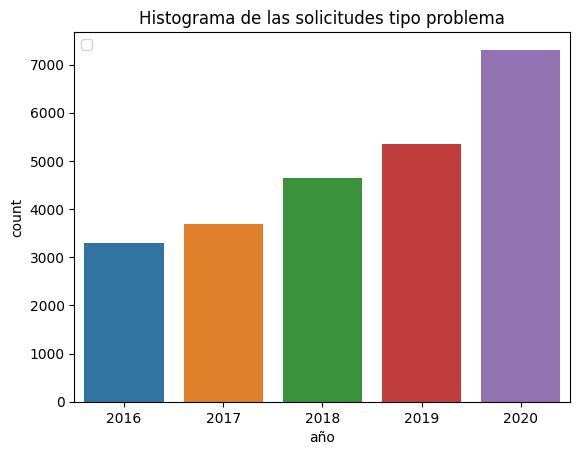

In [23]:
# Histograma seleccionando un total de 15 bins
# iniciamos la figura
plt.figure()

# elegimos el método hisplot con la variable que queremos visualizar
fig = sns.countplot(x='año', data = df_problema)

# Ponemos título a  la gráfica
fig.set_title('Histograma de las solicitudes tipo problema' )
plt.legend()

# mostramos la gráfica
plt.show()

    2. La gráfica anterior nos ha mostrado una tendencia ascendente en el número de solicitudes a lo largo de los años, lo que preocupa a la empresa, por lo que quieres seguir analizando los datos para ver si son capaces de identificar los problemas subyacentes a estas solicitudes. Para esto, quieren saber si hay diferencias a lo largo del año. En concreto nos piden que hagamos un subplot con seaborn donde:
        2.1.  En la primera gráfica tengamos la gráfica que creamos en el ejercicio anterior
        2.2. En la segunda gráfica tengamos la comparación por años y semestres para el número de tickets de tipo "Problema".


<AxesSubplot:xlabel='año', ylabel='count'>

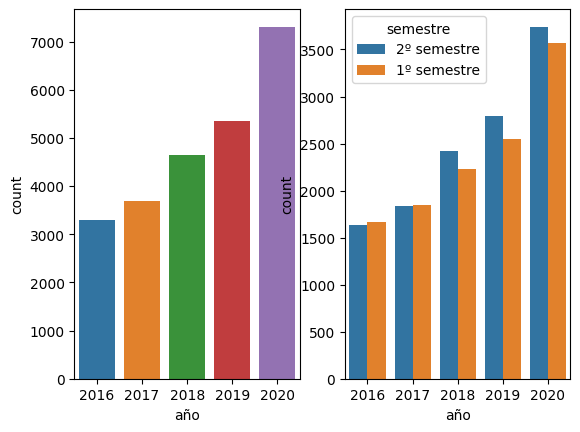

In [32]:
fig, ax = plt.subplots(1,2)
sns.countplot(x='año', data = df_problema, ax= ax[0])
sns.countplot(x='año', data = df_problema, ax= ax[1], hue ="semestre")



    3. La empresa se siente algo aliviada al ver que no hay diferencias entre semestres, pero seguimos sin identificar porque cada año tenemos más solicitudes. Nuestras jefas quieren saber ahora, que prioridad tienen los tickets que tenemos en el conjunto de datos. Por eso nos piden que volvamos a hacer un subplot:
        3.1.  En la primera gráfica deberíamos tener la gráfica creada en el ejercicio 1
        3.2. En la segunda gráfica deberíamos incluir el número de tickets por año en función de la prioridad que tienen.


<AxesSubplot:xlabel='año', ylabel='count'>

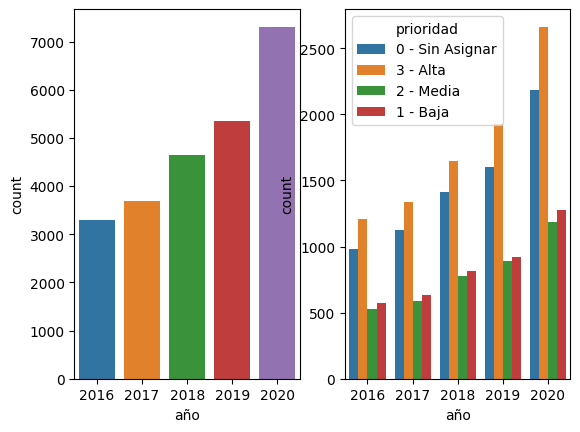

In [33]:
fig, ax = plt.subplots(1,2)
sns.countplot(x='año', data = df_problema, ax= ax[0])
sns.countplot(x='año', data = df_problema, ax= ax[1], hue ="prioridad")

    4. Hasta ahora hemos estado viendo que no parece que haya nada alarmante. Por lo que ahora quieren que evaluemos la cantidad de trabajo que cada empleado esta haciendo, para poder identificar rápidamente un problema en la distribución de tareas y tomar medidas para solucionarlo. Para ello nos piden que hagamos dos gráficas en un subplot:
        4.1. La primera gráfica tiene que tener los 5 empleados con mayor número de tickets, deberemos mostrar quienes son y cuál es total de tickets que atienden cada uno.
        4.2. La primera gráfica tiene que tener los 5 empleados con menor número de tickets, deberemos mostrar quienes son y cuál es total de tickets que atienden cada uno.
📌 NOTA Somos analistas y no nos vale con sacar las gráficas. Incluid una celda de markdown donde expliqueis que es lo que estamos viendo en las gráficas, es decir, haced una interpretación de los resultados.

In [34]:
df_empleo = pd.read_csv("datos/empleo.csv")
df_empleo.head()

,Unnamed: 0,turno,id_empleado,apellido,nombre,id_puesto,email,puesto,departamento,tipo_puesto
0,0,A,6,VILLA,JESUS,50-32200,jesus.villa@tractchun.com,Comprador de Materiales,CONTROL DE PRODUCCION,Administrativo
1,1,NaN,60,DIAZ,PATRICIA,50-32200,patricia.diaz@tractchun.com,Comprador de Materiales,CONTROL DE PRODUCCION,Administrativo
2,2,B,2,DUARTE,ANTONIO,50-32200,antonio.duarte@tractchun.com,Comprador de Materiales,CONTROL DE PRODUCCION,Administrativo
3,3,NaN,24,VILLANUEVA,JESUS,50-32200,jesus.villanueva@tractchun.com,Comprador de Materiales,CONTROL DE PRODUCCION,Administrativo
4,4,NaN,98,GALLEGOS,PATRICIA,50-32200,patricia.gallegos@tractchun.com,Comprador de Materiales,CONTROL DE PRODUCCION,Administrativo


In [36]:
df_completo.head()

,Unnamed: 0_x,id_ticket,fecha,id_empleado,id_agente,categoría,tipo,severidad,prioridad,días_resolución,...,semestre,Unnamed: 0_y,turno,apellido,nombre,id_puesto,email,puesto,departamento,tipo_puesto
0,0,GDDENR-5042564453,2016-07-13,1735.0,4.0,Acceso&%Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0.0,...,2º semestre,796,NaN,PORCHAS,OCHOA,10-32110,ochoa.porchas@tractchun.com,Almacenista,MATERIALES,Administrativo
1,3240,GWLESR-6142530250,2016-06-09,1735.0,32.0,Sistema,Problema,2 - Normal,1 - Baja,11.0,...,1º semestre,796,NaN,PORCHAS,OCHOA,10-32110,ochoa.porchas@tractchun.com,Almacenista,MATERIALES,Administrativo
2,4858,KDLTSR-9842504751,2016-05-14,1735.0,27.0,Sistema,Solicitud,2 - Normal,0 - Sin Asignar,8.0,...,1º semestre,796,NaN,PORCHAS,OCHOA,10-32110,ochoa.porchas@tractchun.com,Almacenista,MATERIALES,Administrativo
3,7035,KMLTSR-6042483650,2016-04-23,1735.0,26.0,Sistema,Solicitud,2 - Normal,2 - Media,10.0,...,1º semestre,796,NaN,PORCHAS,OCHOA,10-32110,ochoa.porchas@tractchun.com,Almacenista,MATERIALES,Administrativo
4,593,GDLTNR-0043045356,2017-11-06 00:00:00,1735.0,23.0,Acceso%&Login,Solicitud,2 - Normal,0 - Sin Asignar,0.0,...,2º semestre,796,NaN,PORCHAS,OCHOA,10-32110,ochoa.porchas@tractchun.com,Almacenista,MATERIALES,Administrativo


In [35]:
df_completo = df_tickets.merge(df_empleo, on='id_empleado')

In [43]:
df_tic_emp = df_completo.groupby("id_empleado")["id_ticket"].count().reset_index()
df_tic_emp = df_tic_emp.sort_values(by = "id_ticket")
empleados_menos_tickets = df_tic_emp.head()
empleados_menos_tickets


,id_empleado,id_ticket
792,793.0,26
98,99.0,27
1194,1195.0,29
1617,1618.0,31
71,72.0,31


In [44]:
empleados_mas_tickets = df_tic_emp.tail()
empleados_mas_tickets

,id_empleado,id_ticket
78,79.0,69
1340,1341.0,70
635,636.0,71
753,754.0,73
284,285.0,73


<AxesSubplot:xlabel='id_empleado', ylabel='id_ticket'>

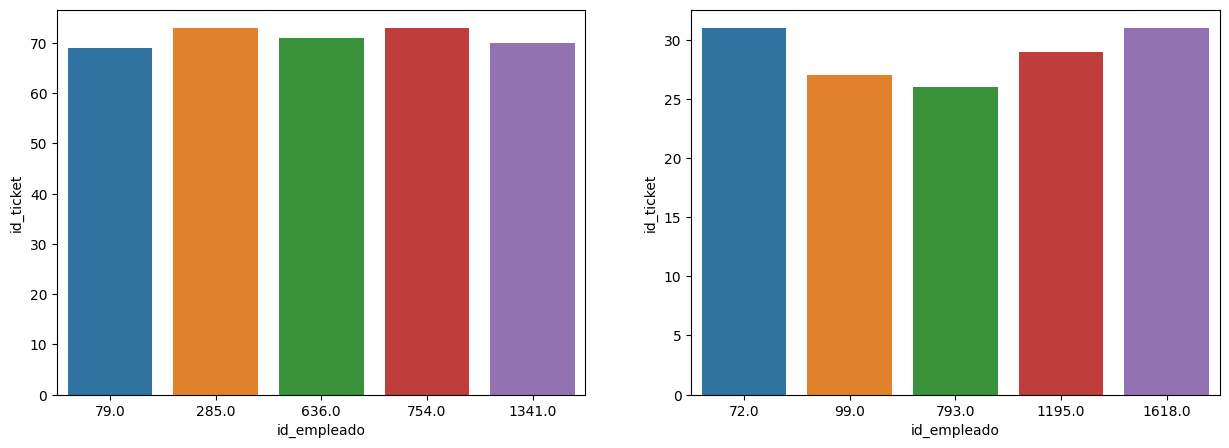

In [47]:
fig, ax = plt.subplots(1,2 ,  figsize =( 15,5))
sns.barplot(x='id_empleado', y = "id_ticket",  data = empleados_mas_tickets, ax= ax[0])
sns.barplot(x='id_empleado', y = "id_ticket", data = empleados_menos_tickets, ax= ax[1])

Estas graficas muestran los empleados con mas y menos tickets atendidos.